In [1]:
from astropy.io import fits
from astropy.table import Table
import numpy as np
import matplotlib.pylab as plt 
import matplotlib.lines as mlines
from matplotlib.legend import Legend
from pythonds.basic.stack import Stack
from math import *
from sklearn.neighbors import KDTree
from lrg_plot_functions import *
from lrg_sum_functions import *
from cosmo_Calc import *
from divideByTwo import *
from read_data import *
from nearNeighbors import *
from scipy import stats
from astropy import stats
import healpy as hp
from localBKG_and_interlopersHEALPix import *
# import healpy as hpy
from makeCutoutTableFunc import *
from plotHistogramProjections3D import *
from read_bricks import *
from mpl_toolkits.axes_grid1 import make_axes_locatable
import random

In [3]:
# read in data

data_Nsat25 = np.load('/Users/mtownsend/Documents/LRG_Data/data_Nsat25_unmasked.npz')
Nsat_data25 = data_Nsat25['Nsat25']
print(Nsat_data25.shape)

# read in null result

data_Nsat_null = np.load('/Users/mtownsend/Documents/LRG_Data/Nsat25_null.npz')
Nsat25_null = data_Nsat_null['high_nullNsat25']

# read in models

data_Nsat_models = np.load('/Users/mtownsend/Documents/LRG_Data/Nsat_models.npz')
Nsat25_mod1 = data_Nsat_models['high_Nsat25_mod1']
Nsat25_mod2 = data_Nsat_models['high_Nsat25_mod2']
Nsat25_mod3 = data_Nsat_models['high_Nsat25_mod3']



(90, 49, 49, 49)


In [4]:
# read in selection matrices

data_smatrix65 = np.load('/Users/mtownsend/Desktop/highz_smatrix-9matrices.npz')
smatrix65 = data_smatrix65['smatrix_low']
print(smatrix65.shape)

(9, 49, 49, 49)


In [5]:
# mask data, null, and models

# data
# 0.2 < z < 0.25
high_maskedNsat25 = []
for i in range(len(Nsat_data25)):
    high_maskedNsat25.append(Nsat_data25[i] * smatrix65[0])
    
# null
# 0.2 < z < 0.25
high_masked_nullNsat25 = []
for i in range(len(Nsat25_null)):
    high_masked_nullNsat25.append(Nsat25_null[i] * smatrix65[0])
    
# models
# 0.2 < z < 0.25
high_masked_Nsat25_mod1 = []
for i in range(len(Nsat25_mod1)):
    high_masked_Nsat25_mod1.append(Nsat25_mod1[i] * smatrix65[0])
    
high_masked_Nsat25_mod2 = []
for i in range(len(Nsat25_mod2)):
    high_masked_Nsat25_mod2.append(Nsat25_mod2[i] * smatrix65[0])
    
high_masked_Nsat25_mod3 = []
for i in range(len(Nsat25_mod3)):
    high_masked_Nsat25_mod3.append(Nsat25_mod3[i] * smatrix65[0])

In [6]:
# sum over various Nsats

# data
sumsat_Nsat = []
for i in range(len(high_maskedNsat25)):
    sumsat_Nsat.append(np.sum(high_maskedNsat25[i]))
    
# null
sumsat_null = []
for i in range(len(high_masked_nullNsat25)):
    sumsat_null.append(np.sum(high_masked_nullNsat25[i]))
    
# models
sumsat_mod1 = []
sumsat_mod2 = []
sumsat_mod3 = []
for i in range(len(high_masked_Nsat25_mod1)):
    sumsat_mod1.append(np.sum(high_masked_Nsat25_mod1[i]))
    sumsat_mod2.append(np.sum(high_masked_Nsat25_mod2[i]))
    sumsat_mod3.append(np.sum(high_masked_Nsat25_mod3[i]))
    


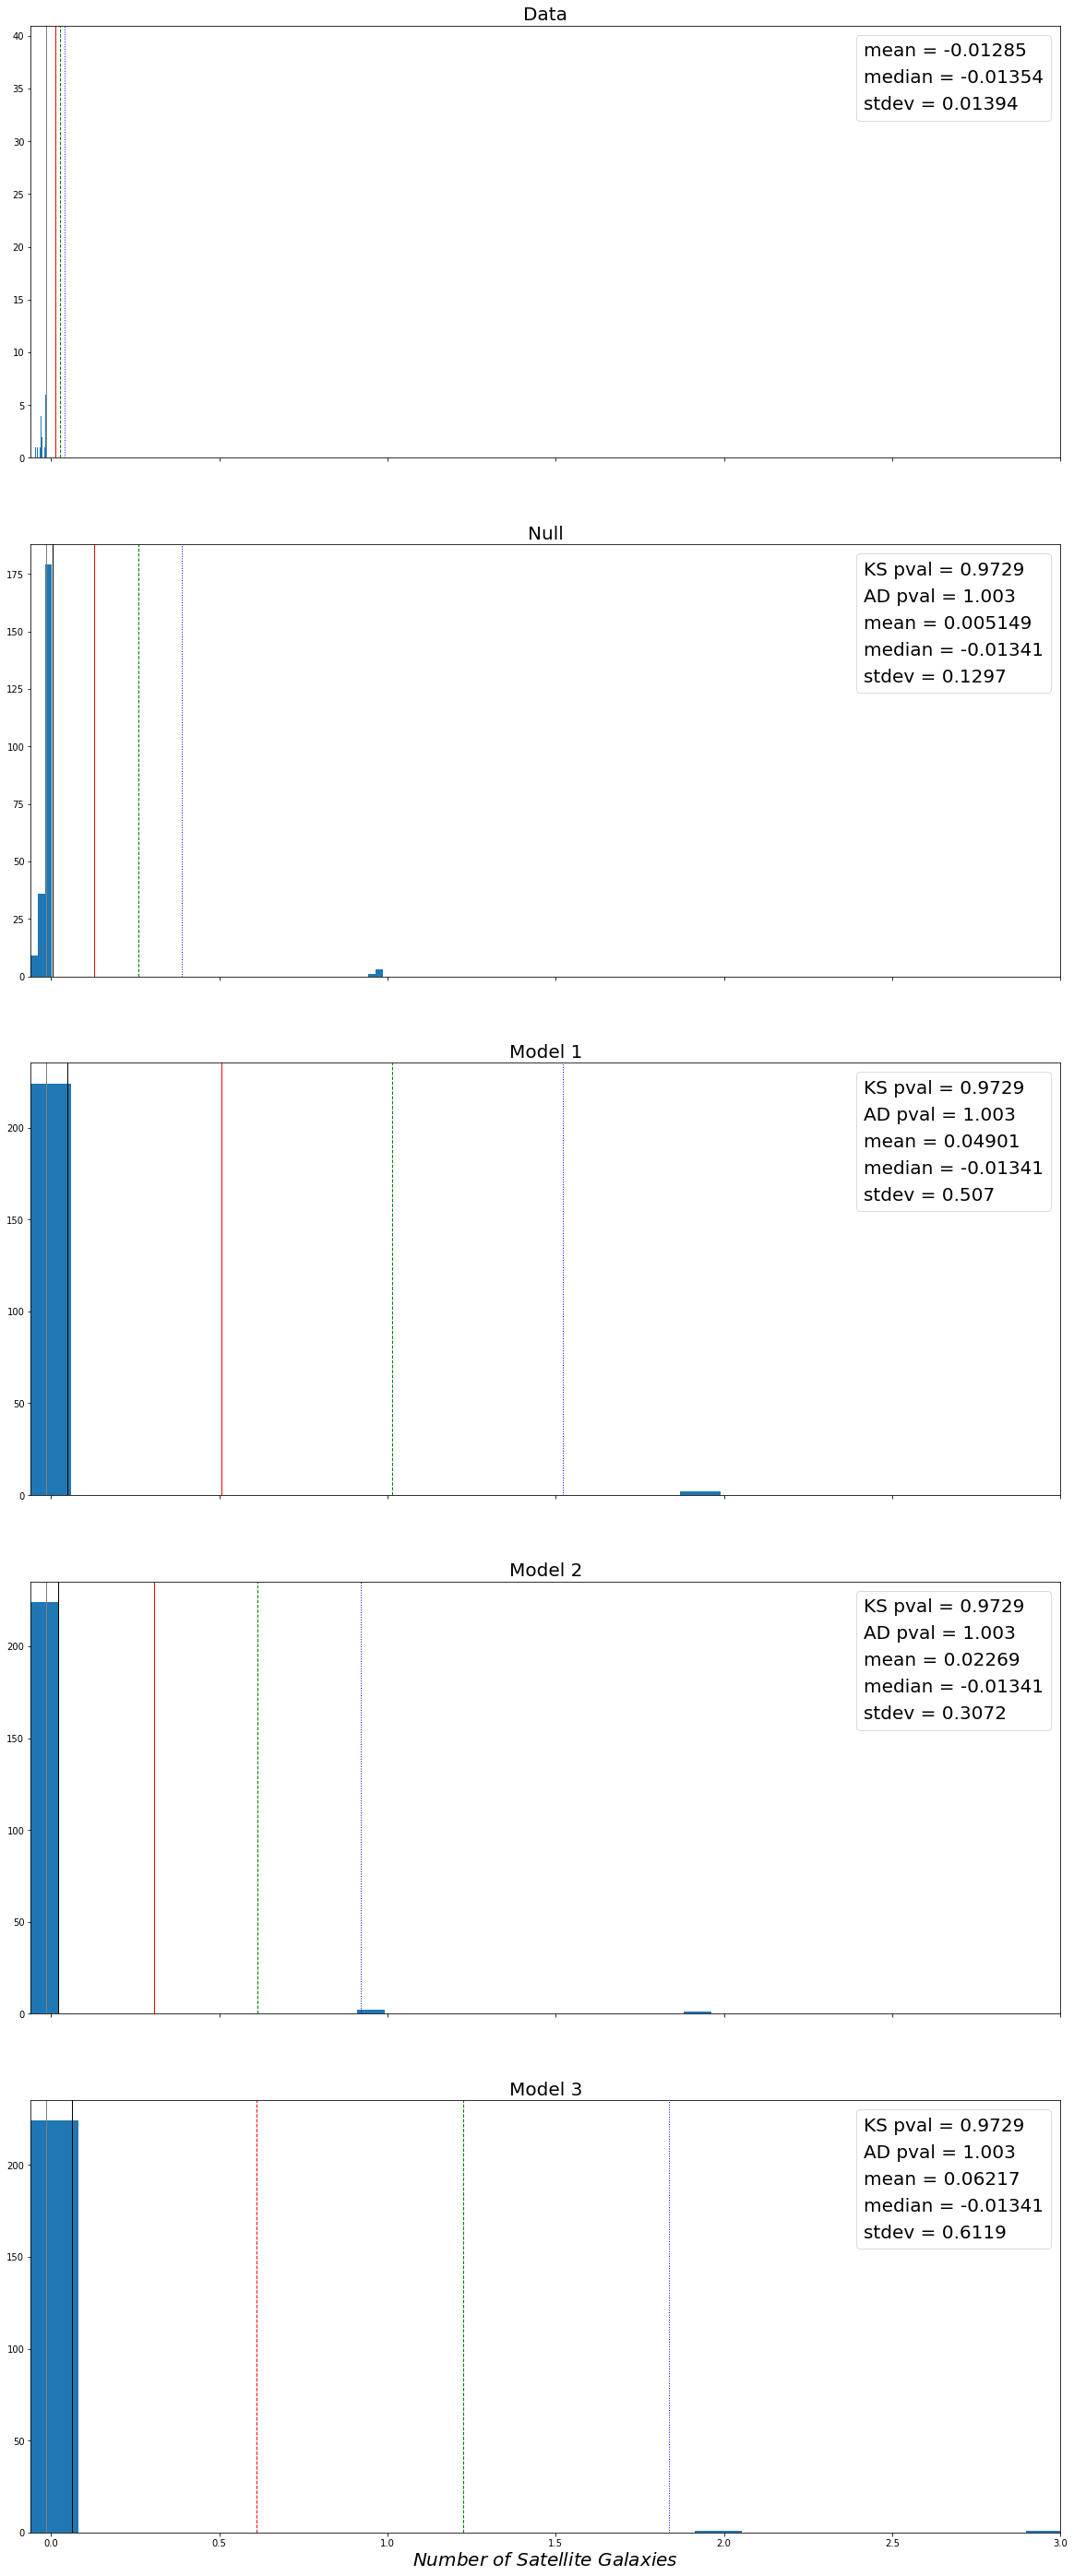

In [14]:
import matplotlib.patches as mpl_patches

fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, sharex=True, figsize=(20, 50))

ax1.hist(sumsat_Nsat, bins=50)
meansat = np.mean(sumsat_Nsat)
mediansat = np.median(sumsat_Nsat)
sdsat = np.std(sumsat_Nsat)

handles = [mpl_patches.Rectangle((0, 0), 1, 1, fc="white", ec="white", lw=0, alpha=0)] * 3
labels = []
labels.append("mean = {0:.4g}".format(meansat))
labels.append("median = {0:.4g}".format(mediansat))
labels.append("stdev = {0:.4g}".format(sdsat))
ax1.legend(handles, labels, loc='best', fontsize='20', fancybox=True, framealpha=0.7, handlelength=0, handletextpad=0)

ax1.axvline(x=sdsat, linewidth=1, ls='-', color='r')
ax1.axvline(x=sdsat*2, linewidth=1, ls='--', color='g')
ax1.axvline(x=sdsat*3, linewidth=1, ls=':', color='b')
ax1.axvline(x=meansat, linewidth=1, ls='-', color='black')
ax1.axvline(x=mediansat, linewidth=1, ls='-', color='gray')
ax1.set_title('Data', fontsize=20)
ax1.set_xlim(xmax=3)

# --------------------------

ax2.hist(sumsat_null, bins=50)
meansat_null = np.mean(sumsat_null)
mediansat_null = np.median(sumsat_null)
sdsat_null = np.std(sumsat_null)

handles = [mpl_patches.Rectangle((0, 0), 1, 1, fc="white", ec="white", lw=0, alpha=0)] * 5
labels = []
labels.append("KS pval = {0:.4g}".format(0.9728726043864034))
labels.append("AD pval = {0:.4g}".format(1.0033227987143398))
labels.append("mean = {0:.4g}".format(meansat_null))
labels.append("median = {0:.4g}".format(mediansat_null))
labels.append("stdev = {0:.4g}".format(sdsat_null))
ax2.legend(handles, labels, loc='best', fontsize='20', fancybox=True, framealpha=0.7, handlelength=0, handletextpad=0)

ax2.axvline(x=sdsat_null, linewidth=1, ls='-', color='r')
ax2.axvline(x=sdsat_null*2, linewidth=1, ls='--', color='g')
ax2.axvline(x=sdsat_null*3, linewidth=1, ls=':', color='b')
ax2.axvline(x=meansat_null, linewidth=1, ls='-', color='black')
ax2.axvline(x=mediansat_null, linewidth=1, ls='-', color='gray')
ax2.set_title('Null', fontsize=20)
ax2.set_xlim(xmax=3)

# --------------------------

ax3.hist(sumsat_mod1, bins=50)
meansat_mod1 = np.mean(sumsat_mod1)
mediansat_mod1 = np.median(sumsat_mod1)
sdsat_mod1 = np.std(sumsat_mod1)

handles = [mpl_patches.Rectangle((0, 0), 1, 1, fc="white", ec="white", lw=0, alpha=0)] * 5
labels = []
labels.append("KS pval = {0:.4g}".format(0.9728726043864034))
labels.append("AD pval = {0:.4g}".format(1.0033227987143398))
labels.append("mean = {0:.4g}".format(meansat_mod1))
labels.append("median = {0:.4g}".format(mediansat_mod1))
labels.append("stdev = {0:.4g}".format(sdsat_mod1))
ax3.legend(handles, labels, loc='best', fontsize='20', fancybox=True, framealpha=0.7, handlelength=0, handletextpad=0)

ax3.axvline(x=sdsat_mod1, linewidth=1, ls='-', color='r')
ax3.axvline(x=sdsat_mod1*2, linewidth=1, ls='--', color='g')
ax3.axvline(x=sdsat_mod1*3, linewidth=1, ls=':', color='b')
ax3.axvline(x=meansat_mod1, linewidth=1, ls='-', color='black')
ax3.axvline(x=mediansat_mod1, linewidth=1, ls='-', color='gray')
ax3.set_title('Model 1', fontsize=20)
ax3.set_xlim(xmax=3)

# --------------------------

ax4.hist(sumsat_mod2, bins=50)
meansat_mod2 = np.mean(sumsat_mod2)
mediansat_mod2 = np.median(sumsat_mod2)
sdsat_mod2 = np.std(sumsat_mod2)

handles = [mpl_patches.Rectangle((0, 0), 1, 1, fc="white", ec="white", lw=0, alpha=0)] * 5
labels = []
labels.append("KS pval = {0:.4g}".format(0.9728726043864034))
labels.append("AD pval = {0:.4g}".format(1.0033227987143398))
labels.append("mean = {0:.4g}".format(meansat_mod2))
labels.append("median = {0:.4g}".format(mediansat_mod2))
labels.append("stdev = {0:.4g}".format(sdsat_mod2))
ax4.legend(handles, labels, loc='best', fontsize='20', fancybox=True, framealpha=0.7, handlelength=0, handletextpad=0)

ax4.axvline(x=sdsat_mod2, linewidth=1, ls='-', color='r')
ax4.axvline(x=sdsat_mod2*2, linewidth=1, ls='--', color='g')
ax4.axvline(x=sdsat_mod2*3, linewidth=1, ls=':', color='b')
ax4.axvline(x=meansat_mod2, linewidth=1, ls='-', color='black')
ax4.axvline(x=mediansat_mod2, linewidth=1, ls='-', color='gray')
ax4.set_title('Model 2', fontsize=20)
ax4.set_xlim(xmax=3)

# --------------------------

ax5.hist(sumsat_mod3, bins=50)
meansat_mod3 = np.mean(sumsat_mod3)
mediansat_mod3 = np.median(sumsat_mod3)
sdsat_mod3 = np.std(sumsat_mod3)

handles = [mpl_patches.Rectangle((0, 0), 1, 1, fc="white", ec="white", lw=0, alpha=0)] * 5
labels = []
labels.append("KS pval = {0:.4g}".format(0.9728726043864034))
labels.append("AD pval = {0:.4g}".format(1.0033227987143398))
labels.append("mean = {0:.4g}".format(meansat_mod3))
labels.append("median = {0:.4g}".format(mediansat_mod3))
labels.append("stdev = {0:.4g}".format(sdsat_mod3))
ax5.legend(handles, labels, loc='best', fontsize='20', fancybox=True, framealpha=0.7, handlelength=0, handletextpad=0)

ax5.axvline(x=sdsat_mod3, linewidth=1, ls='--', color='r')
ax5.axvline(x=sdsat_mod3*2, linewidth=1, ls='--', color='g')
ax5.axvline(x=sdsat_mod3*3, linewidth=1, ls=':', color='b')
ax5.axvline(x=meansat_mod3, linewidth=1, ls='-', color='black')
ax5.axvline(x=mediansat_mod3, linewidth=1, ls='-', color='gray')
ax5.set_title('Model 3', fontsize=20)
ax5.set_xlim(xmax=3)

# fig.tight_layout()
# fig.subplots_adjust(hspace=0.5)
plt.xlabel(r'$Number$ $of$ $Satellite$ $Galaxies$', fontsize=20)
# plt.title('Distributions for 0.2 < z < 0.25, log(lum)=10.47')
plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/20Nov2020/model_comparison_plot_high25-truncated.pdf')
plt.show()


In [7]:
from scipy import stats

# compare null to data

high_ad_stat25_null, crit_vals25_null, sig_level25_null = stats.anderson_ksamp([sumsat_null, sumsat_Nsat])
print(high_ad_stat25_null)
print(crit_vals25_null)
print(sig_level25_null)

print('----')

# compare models to data

high_ad_stat25_mod1, crit_vals25_mod1, sig_level25_mod1 = stats.anderson_ksamp([sumsat_mod1, sumsat_Nsat])
print(high_ad_stat25_mod1)
print(crit_vals25_mod1)
print(sig_level25_mod1)

print('----')

high_ad_stat25_mod2, crit_vals25_mod2, sig_level25_mod2 = stats.anderson_ksamp([sumsat_mod2, sumsat_Nsat])
print(high_ad_stat25_mod2)
print(crit_vals25_mod2)
print(sig_level25_mod2)

print('----')

high_ad_stat25_mod3, crit_vals25_mod3, sig_level25_mod3 = stats.anderson_ksamp([sumsat_mod3, sumsat_Nsat])
print(high_ad_stat25_mod3)
print(crit_vals25_mod3)
print(sig_level25_mod3)

print('----')
print('----')

high_ks_stat25_null, pval25_null = stats.ks_2samp(sumsat_null, sumsat_Nsat)
print(high_ks_stat25_null)
print(pval25_null)

print('----')

high_ks_stat25_mod1, pval25_mod1 = stats.ks_2samp(sumsat_mod1, sumsat_Nsat)
print(high_ks_stat25_mod1)
print(pval25_mod1)

print('----')

high_ks_stat25_mod2, pval25_mod2 = stats.ks_2samp(sumsat_mod2, sumsat_Nsat)
print(high_ks_stat25_mod2)
print(pval25_mod2)

print('----')

high_ks_stat25_mod3, pval25_mod3 = stats.ks_2samp(sumsat_mod3, sumsat_Nsat)
print(high_ks_stat25_mod3)
print(pval25_mod3)

-0.9935439904011537
[0.325 1.226 1.961 2.718 3.752]
1.0033227987143398
----
-0.9935439904011537
[0.325 1.226 1.961 2.718 3.752]
1.0033227987143398
----
-0.9935439904011537
[0.325 1.226 1.961 2.718 3.752]
1.0033227987143398
----
-0.9935439904011537
[0.325 1.226 1.961 2.718 3.752]
1.0033227987143398
----
----
0.05935672514619883
0.9728726043864034
----
0.05935672514619883
0.9728726043864034
----
0.05935672514619883
0.9728726043864034
----
0.05935672514619883
0.9728726043864034


/Users/mtownsend/anaconda/envs/astroconda/lib/python3.5/site-packages/scipy/stats/morestats.py:1680: UserWarning: approximate p-value will be computed by extrapolation
  warnings.warn("approximate p-value will be computed by extrapolation")


mean number of satellites is -0.012851509242558927
median number of satellites is -0.013538466446976514
standard deviation of satellites is 0.01393937171677908
standard error is 0.0014775704468406438


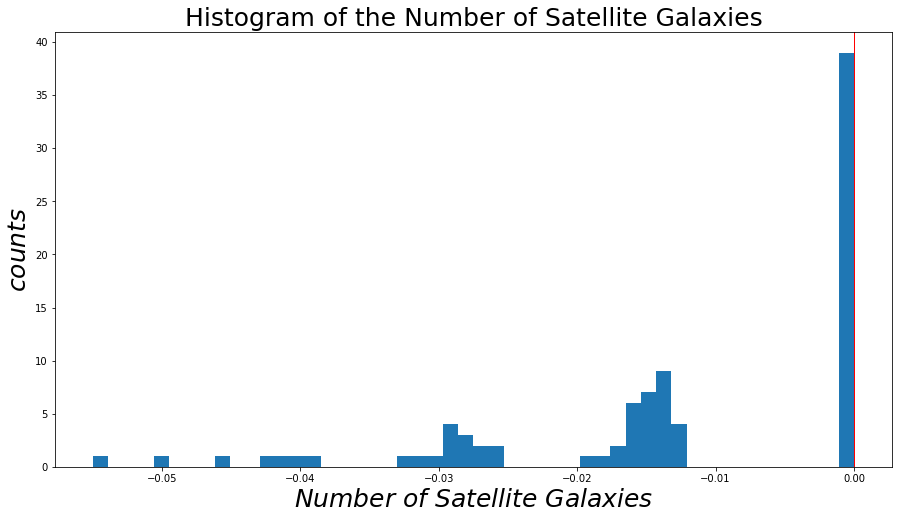

mean number of satellites is 0.005148942790378863
median number of satellites is -0.013413970498583339
standard deviation of satellites is 0.1297344504246738
standard error is 0.008610777906446689


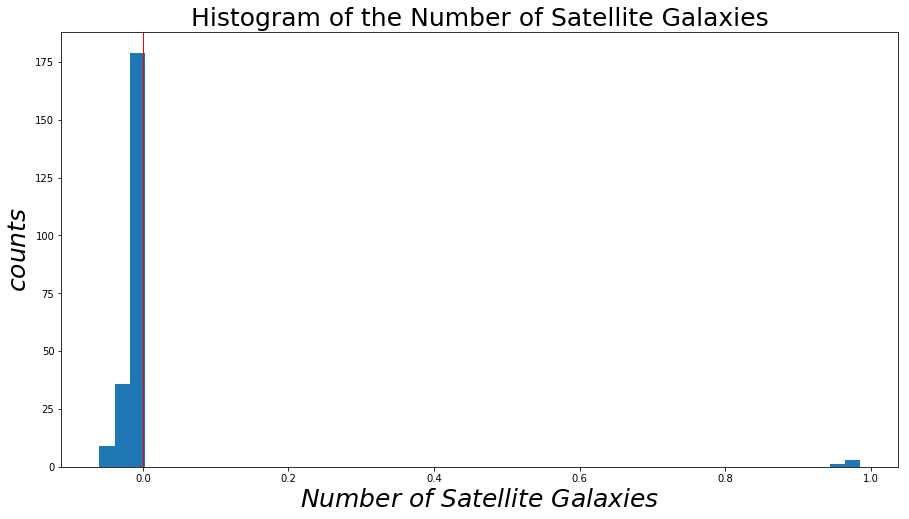

mean number of satellites is 0.04900859191318587
median number of satellites is -0.013413970498583339
standard deviation of satellites is 0.5069668349136888
standard error is 0.03364857065402698


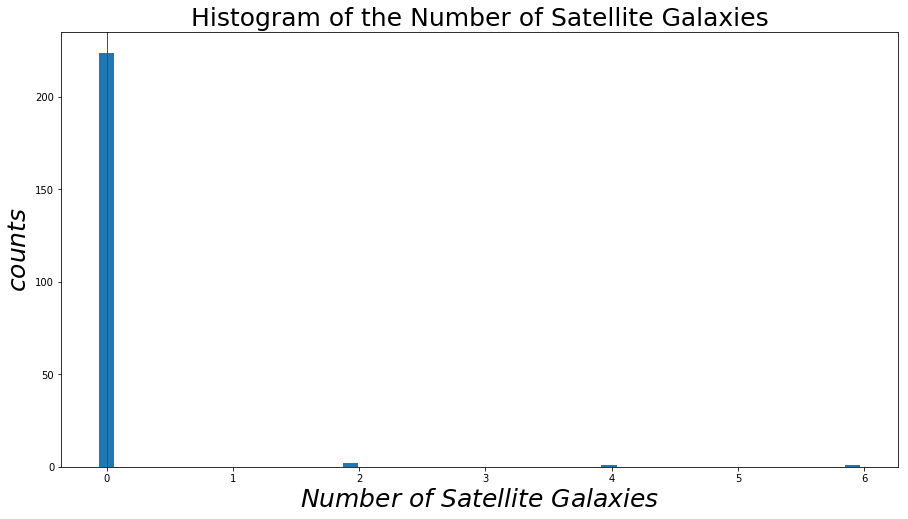

mean number of satellites is 0.02269280243950167
median number of satellites is -0.013413970498583339
standard deviation of satellites is 0.3072300442310952
standard error is 0.020391574238006836


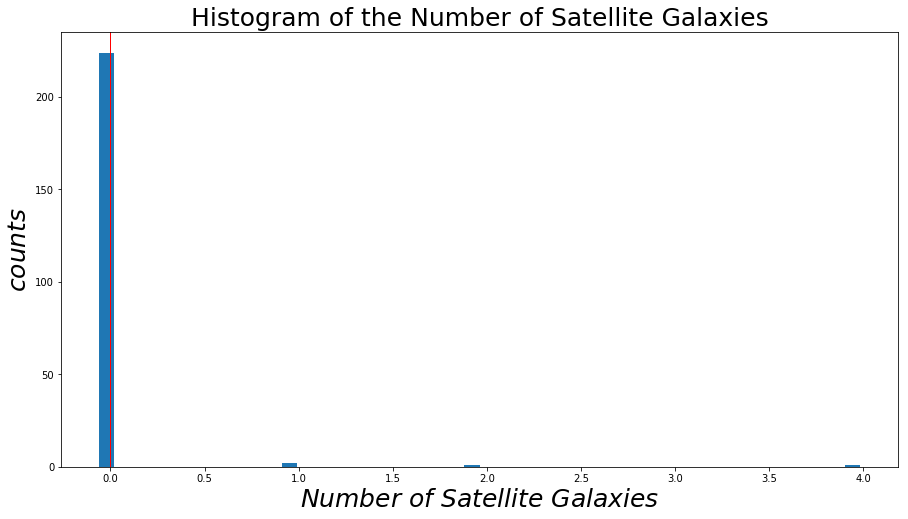

mean number of satellites is 0.02269280243950167
median number of satellites is -0.013413970498583339
standard deviation of satellites is 0.3072300442310952
standard error is 0.020391574238006836


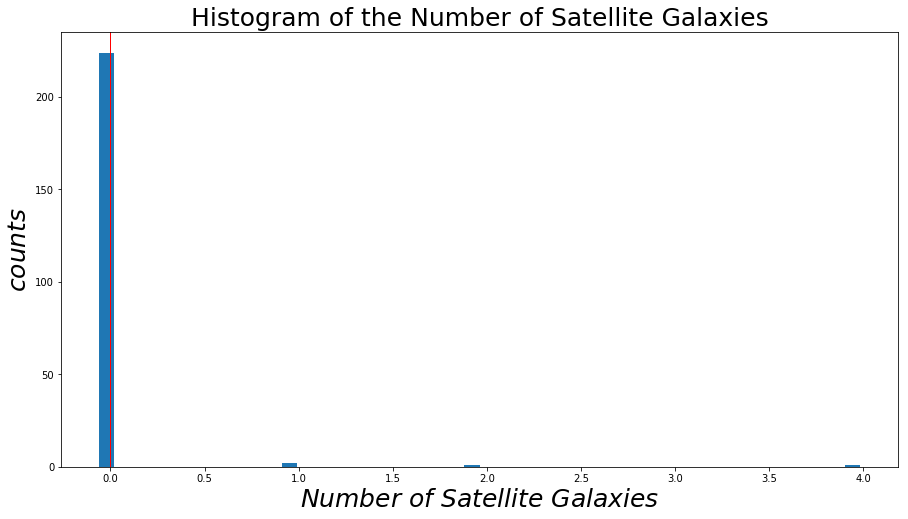

In [33]:
totalNsat(high_maskedNsat25)
plt.show()
totalNsat(high_masked_nullNsat25)
plt.show()
totalNsat(high_masked_Nsat25_mod1)
plt.show()
totalNsat(high_masked_Nsat25_mod2)
plt.show()
totalNsat(high_masked_Nsat25_mod3)
plt.show()

In [ ]:
def totalNsat(Nsat, lum, z1, z2, string):

    import matplotlib.pylab as plt 
    import numpy as np
    from scipy import stats
    
    left, width = .25, .5
    bottom, height = .25, .5
    right = left + width
    top = bottom + height


    sumsat = []

    # Sum up number of satellite galaxies for every LRG
    for i in range(len(Nsat)):
        sumsat.append(np.sum(Nsat[i]))

    meansat = np.mean(sumsat)
    print("mean number of satellites is", meansat)
    
    mediansat = np.median(sumsat)
#     print("median number of satellites is", mediansat)

    sdsat = np.std(sumsat)
#     print("standard deviation of satellites is", sdsat)

    sterr = stats.sem(sumsat)
#     print("standard error is", sterr)
    
#     eighty = np.percentile(sumsat, 80.)
# #     print("80th percentile = ", eighty)
#     ninety = np.percentile(sumsat, 90.)
# #     print("90th percentile = ", ninety)
#     ninetynine = np.percentile(sumsat, 99.)
# #     print("99th percentile = ", ninetynine)

    plt.rcParams["figure.figsize"] = [15, 8]
    fig = plt.figure()
    ax = fig.add_subplot(111)
#     plt.title("Histogram of the Number of Satellite Galaxies; log(lum)=10.36; 0.55 < z < 0.6", fontsize=25)
    plt.title("Histogram of the Number of Satellite Galaxies; log(lum)={}; {} < z < {}; ({})".format(lum, z1, z2, string), fontsize=18)
    plt.hist(sumsat, bins=50)
    plt.xlabel(r'$Number$ $of$ $Satellite$ $Galaxies$', fontsize=20)
    plt.ylabel(r'$counts$', fontsize=20)
#     plt.axvline(x=eighty, linewidth=1, ls='-', color='r')
#     plt.axvline(x=ninety, linewidth=1, ls='--', color='g')
#     plt.axvline(x=ninetynine, linewidth=1, ls=':', color='b')
    plt.text(top, right,'mean = {}'.format(meansat), fontsize=14, ha='center', va='center', transform=ax.transAxes)
    plt.text(top, right-0.05,'median = {}'.format(mediansat), fontsize=14, ha='center', va='center', transform=ax.transAxes)
#     plt.text(top, right-0.1,'99th = {}'.format(ninetynine), fontsize=14, ha='center', va='center', transform=ax.transAxes)
    # plt.show()
    return(sumsat)